# init

In [ ]:
# init
import numpy as np
import matplotlib.pyplot as plt

def tridiagonal(sub,diag,sup,rhs):   #function definition
    """
    Solves a tridiagonal system of equations using Gauss Elimination method
    
    tridiagonal(sub,diag,sup,rhs)
    Solves a tridiagonal system of equations Ax=b to obtain x using Gauss Elimination method
    The coefficient matrix A is defined based on its diagonal, sub-diagonal (below diaginal) 
    and super-diagonal (above diaginal) vectors. 
    All input arguments sub,diag,sup and rhs as must have the same length. 
    The output vector x has the same length as these vectors.
    Input:
        sub: sub-diagonal vector of the matrix. The first element of this vector must be zero
        diag: diagonal vector of the matrix
        sub: super-diagonal vector of the matrix. The last element of this vector must be zero
        rhs: the right-hand side vector
    Output
        x: the unknown vector
    """
    
    n = diag.shape[0] # length of vectors
    # check if vector lengths are equal, if not show an error message
    assert sub.shape[0] == n and  \
           sup.shape[0] == n and  \
           rhs.shape[0] == n      \
           , "all vector lengths must be equal"
    # check if the 1st element of sub ector sf zero, if not show an error message       
    assert sub[0] == 0 , "the first element of sub must be zero"
    # check if the last element of sup ector is zero, if not show an error message       
    assert sup[-1] == 0 , "the last element of sup must be zero"  
    # make local copies of vectors so that the original copies are not over-written
    sub1 = sub.copy()
    diag1 = diag.copy()
    sup1 = sup.copy()
    rhs1 = rhs.copy()
    x = np.zeros(n)   #initiate x vector of size n filled with zeros
    # forward elimination
    for i in range(1,n):
        fac = - sub1[i] / diag1[i-1]  #Factor f for all subsequent rows 
        diag1[i] = diag1[i] + fac * sup1[i-1] #using pivot element to eliminate the sub vector
        rhs1[i] = rhs1[i] + fac * rhs1[i-1]   #using pivot element to modify the rhs vector
    # at this stage an upper triangle matrix results    
    # back substitution
    x[n-1] = rhs1[n-1] / diag1[n-1] #calculate x on the last row
    for i in range(n-2,-1,-1):    #calculate x for row i from n-2 down to 0
        x[i] = (rhs1[i] - sup1[i] * x[i+1]) / diag1[i]     
    return x   #returns x

def rk4sys(rhs, xint, y0, h = 1, *args):
  """
  rk4sys: ODE solver based on 4th order Runge-Kutta method for a system of ODEs

  rk4sys(rhs, xint, y0, h = 1, *args):
           uses 4th order Runge-Kutta method to solve a system of ODEs
  input:
    rhs : the RHS function as rhs(x,y,*args) 
          where y is a vector of dependent variables
    xint: independent variable interval which can be specified 2 ways:
          1) [x0, xf] 
             where x0 is initial and xf is final value of independent variable.
             Output will be on x values in [x0 xf] interval with step size h
          2) [x0, x1, ..., xf] which are the specific x values for which solution 
              should be output
    y0 : vector of dependent variables initial value
    h : step size (h = 1 by default)
    *args : additional parameters passed to the rhs function
  output:
    x : vector of the independent variable
    y : vector of solution for all the dependent variables
  """
  import numpy as np
  # makeing sure x is in ascending order
  xdiff = np.diff(xint)
  assert np.min(xdiff) >= 0 , "x array is not in ascending order"

  n = xint.size - 1  # index for the last element of xint
  x0 = xint[0]
  xf = xint[-1]
  if n == 1:
    x = np.arange(x0, xf + h, h)
    n = x.size - 1  # index for the last element of x
    if x[n] < xf:
      np.append(x,xf)
      n = n + 1
  else:
    x = xint

  if np.isscalar(y0):
    m = 1  
  else:
    m = y0.size 
  yp = np.zeros((m,n+1),float)
  xp = np.zeros(n+1,float)
  xx = x0
  yy = y0
  np = 0
  xp[np] = xx
  yp[:,np] = yy
  i = 0
  while True:
    xend = x[np+1]
    hh = x[np+1] - x[np]
    if hh > h:
      hh = h
    while True:
      if xx + hh > xend:
        hh = xend - xx
      k1 = rhs(xx, yy, *args)  # calculates k1 using RHS function at x[i] and y[i,:]
      y1 = yy + k1 * 0.5 * hh
      k2 = rhs(xx + 0.5 * hh, y1, *args)
      y1 = yy + k2 * 0.5 * hh
      k3 = rhs(xx + 0.5 * hh, y1, *args)
      y1 = yy + k3 * hh
      k4 = rhs(xx + hh, y1, *args)
      phi = (k1 + 2. * (k2 + k3) + k4) / 6.
      yy1 =  yy + phi * hh
      xx = xx + hh
      i = i + 1
      yy = yy1
      if xx >= xend:
        break
    np = np + 1
    xp[np] = xx
    yp[:,np] = yy
    if xx >= xf:
      break
  return xp, yp


def lagrangeInt(x, y, xx):
    """
    lagrangeInt: Lagrange interpolating polynomial

    lagrangeInt(x,y,xx): Uses an (n - 1)th order Lagrange interpolating polynomials
    using n data points (x, y) to determine the intermediate yy value at a given
    xx independent varialble value
    Input:
      x: independent variable
      y: dependent variable
      xx: intermediate value of the independent variable
    Output:
      yy = interpolated value of dependent variable
    """
    import numpy as np
    # check if x and y vectors have the same length. If not show an error message
    assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
    n = x.shape[0]  # number of elements in x
    sum = 0.
    for i in range(n):
        product = y[i]      #set product=y(i) initially
        for j in range(n):  #calculate the product 
            if i != j:      #for all j values except for i=j
                product = product * (xx - x[j]) / (x[i] - x[j])  #calculating the Li * yi terms
        sum = sum + product
    yy = sum
    return yy


def modsecant(func, x0, delta = 1e-5, tol = 1e-4, maxit = 50, *args): #modsecant function
    """Finds roots of a function using modified secant method

    modsecant(func, x0, delta = 1e-5, tol = 1e-4, maxit = 50, *args)
    Finds roots of a function (f(x)=0) using modified secant method
    Input:
    - func: an anonymous function for f(x)
    - x0: initial guess of the root
    - delta: perturbation fraction (default = 1e-5)
    - tol : error tolerance (%) (default = 0.0001%)
    - maxit: maximum number of iterations (default = 50)
    - *args: any extra arguments to func (optional)
    Output:
    - xr: the root
    - fx: value of func at the root
    - err: relative approximate error (%)
    - iter: number of iterations
    """
    
    small = 1e-20 # a small number   
    iter = 0    # initial value of iteration count
    err = 1000  # initial value of relative approximate error (%)
    xr = x0
    
    while err > tol and iter < maxit: # while err is greater than the tolerance (tol)
                                      # and iter < maxit continue the loop        
       iter = iter + 1 # increment iter
       xr_old = xr     # save the previous copy of xr for error calculation
       fx = func(xr, *args)   #func value at xr 
       if fx == 0: # if fx=0, xr is the root -> terminate the function
           err = 0
           return xr, fx, err, iter
       fxd = func(xr * (1 + delta), *args)   #func value at xr*(1+delta)
       xr = xr - fx * xr * delta / (fxd - fx)
       err=abs((xr-xr_old)/(xr + small))*100 # relative approximate error (%)
                                           # (a small number is added to the 
                                           # denominator to avoid /0 in case xr=0)
       
    root = xr
    fx = func(root, *args)
    if iter == maxit: # show a warning if the function is terminated due to iter=maxit
        print('Warning: modsecant function is terminated because iter=maxit;') 
        print('         error < tolerance stopping criterion may not be satisfied')

    return xr, fx, err, iter   #returns xr, fx, err, iter 

# Q1
The basic differential equation of the elastic curve for a simply supported, uniformly loaded beam (figure below) is given as
$$
EI\frac{d^2 y}{dx^2}=\frac{wLx}{2}-\frac{wx^2}{2}
$$
where $E$ is the modulus of elasticity and $I$ is the moment of inertia. The boundary conditions are $y(0) = y(L) = 0$. Solve for the deflection of the beam using the shooting method with the step size of $h=0.1$ m. The following parameter values apply: $E = 200 \times 10^9$ N/m, $I = 3\times10^{-4}\, \rm{m^4}$, $w= 15000$ N/m, and $L = 3$ m. Compare your numerical results with the analytical solution:
$$
y=\frac{wLx^3}{12EI}-\frac{wx^4}{24EI}-\frac{wL^3x}{24EI}
$$
Output the shooting method solution $y$ at $x=1.5$ m.


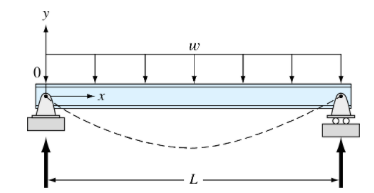

Check modsecant: f= 6.776263578034403e-20 ea=  2.460456606974879e-08 iter=  2
za = -2.63671875e-04

za gives: T(L)= 6.776263578034403e-20  ~ 0 -> dy/dx(0)= za is the correct intial condition -> y is the correct solution


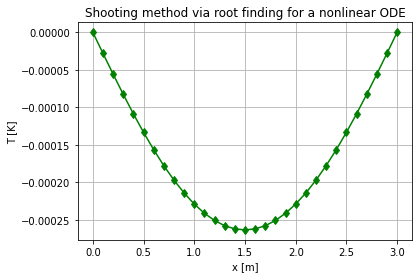

In [ ]:
# Q1 Answer
E = 200 * 1.e9
I = 3 * 1.e-4
w = 15000
L = 3.
dy = lambda x, y: np.array([y[1], ((w*L*x)/(E*I*2.)) - ((w*x*x)/(E*I*2.))])
T0 = 0.
TL = 0.
h = 0.1
xint = np.array([0., L])

def residual(z):
  y0 = np.array([T0, z])
  x, y =rk4sys(dy, xint, y0, h)
  res = y[0,-1] - TL
  return res

z0 = -0.0001
za, fx, ea, iter = modsecant(residual, z0, delta=1e-6, tol=1e-6)
print('Check modsecant: f=', fx, 'ea= ', ea, 'iter= ', iter)
print('za = -2.63671875e-04')
y0 = np.array([0., za])
x, y = rk4sys(dy, xint, y0, h)
TL = y[0, -1]
print()
print('za gives: T(L)=', TL, ' ~ 0 -> dy/dx(0)= za is the correct intial condition -> y is the correct solution')
xp = np.linspace(0,3)
y2 = ((w*L*xp**3)/(12*E*I)) - ((w*xp**4)/(24*E*I)) - ((w*(L**3)*xp)/(24*E*I))
plt.plot(x, y[0,:], 'gd-')
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.title('Shooting method via root finding for a nonlinear ODE')
plt.show();



# Q2
Solve the ODE in Q1 using finite-difference method with 2nd order accuracy. Consider $n=6$ nodes, i.e., the step size of $h = \Delta x = 0.6$ m. Compare the results with the exact solution given in Q1. Output the finite-difference method solution $y$ at $x=0.6$ m.

T [m] at the internal nodes = 
 [-9.720e-05 -1.944e-04 -1.944e-04 -9.720e-05]
T [m] at all nodes = 
 [ 0.00000000e+00 -9.72000000e-05 -1.94400000e-04 -1.94400000e-04
 -9.72000000e-05  6.77626358e-20]


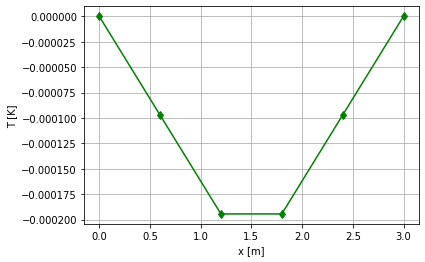

In [ ]:
# Q2 Answer
n=6
h=L/float(n-1)

x = np.zeros(n,float)
y2 = np.zeros(n,float)
T = np.zeros(n, float)

x=np.array([float(i-1) * h for i in range(1,n+1)])

m=n-2

diag=np.zeros(m,float)
subDiag=np.zeros(m,float)
supDiag=np.zeros(m,float)
rhs = np.zeros(m, float)

diag[:] = -2
subDiag[1:] = 1.
supDiag[:-1] = 1.
rhs[1:-1] = ((w*L*x[-4:-2]-w*x[-4:-2]**2.)/(2*E*I))*(h**2.)
rhs[0] = ((w*L*x[0]-w*x[0]**2)/2.)*(h**2./(E*I))+T0 
rhs[-1] = ((w*L*x[-1]-w*x[-1]**2)/2.)*(h**2./(E*I))+TL

Tinternal = tridiagonal(subDiag,diag,supDiag,rhs)
print('T [m] at the internal nodes = \n', Tinternal)
T[1:-1] = Tinternal
T[0] = T0
T[-1] = TL
print('T [m] at all nodes = \n', T)

plt.plot(x, T, 'gd-')
plt.grid(True)
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.show();